<a href="https://colab.research.google.com/github/Matthieu-PERRIN-dev/Deep_learning_with_python/blob/main/A_multiclass_classification_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*The Reuters Dataset*

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [14]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

**Encoding the input data :**

In [15]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000) :
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences) :
    for j in sequence :
      results[i, j] = 1.
  return results

In [16]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding labels**

In [20]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), 46))
  for i, label in enumerate(labels) :
      results[i, label] = 1.
  return results

In [21]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

Note that there is a built-in way to do this in Keras :

```
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
```



**Model definition**

In [30]:
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax"),
])

**Compile the model :**

In [31]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

**Setting aside a validation test :**

In [32]:
partial_x_train = x_train[:1000]
x_val = x_train[1000:]
partial_y_train = y_train[:1000]
y_val = y_train[1000:]

**Training the model :**

In [33]:
history = model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.1239 - loss: 3.8168 - val_accuracy: 0.3520 - val_loss: 3.6362
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 449ms/step - accuracy: 0.3597 - loss: 3.5646 - val_accuracy: 0.3530 - val_loss: 3.3650
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step - accuracy: 0.3572 - loss: 3.2513 - val_accuracy: 0.3535 - val_loss: 3.0852
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 439ms/step - accuracy: 0.3797 - loss: 2.9165 - val_accuracy: 0.4404 - val_loss: 2.8204
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step - accuracy: 0.4933 - loss: 2.5893 - val_accuracy: 0.5085 - val_loss: 2.5826
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 451ms/step - accuracy: 0.5674 - loss: 2.3021 - val_accuracy: 0.5476 - val_loss: 2.3754
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 459ms/step - accuracy: 0.6276 - loss: 2.0546 - val_accuracy: 0.5861 - val_loss: 2.2085
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 481ms/step - accuracy: 0.6831 - loss: 1.8063 - val_accuracy: 0.5970 - val_loss: 2.

**Plotting the LOSS of training and validation**

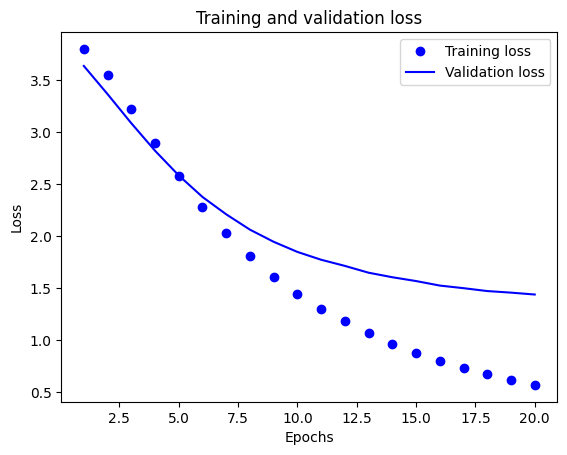

In [35]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the ACCURACY of training and validation**

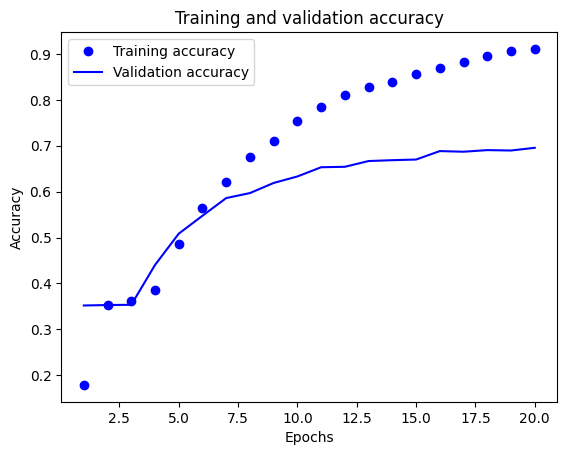

In [36]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=9, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.4209 - loss: 3.0966
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6599 - loss: 1.5394
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7433 - loss: 1.1680
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7976 - loss: 0.9416
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8421 - loss: 0.7534
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8633 - loss: 0.6371
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8911 - loss: 0.5231
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9042 - loss: 0.4466
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.9202 - loss: 0.3686
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7985 - loss: 0.8713


In [38]:
print(results)

[0.9040960669517517, 0.7938557267189026]


**Generating predictions on new data :**

In [39]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [42]:
rslt = np.zeros((len(predictions),))
for i, probas in enumerate(predictions):
  rslt[i] = np.argmax(probas)
print(rslt)

[ 4. 10.  1. ...  3.  4. 24.]
